In [ ]:
# A SIMPLE IMAGE PREDICTER PROGRAMME BY ME!!(KUSHAGRA GANGWAR)

In [ ]:
print("hello! there...")

hello! there...


In [ ]:
# Importing tensorflow and keras for mathematics, GPU acceleration, and optimization and for high level API

In [ ]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.19.0
Keras version: 3.10.0


In [ ]:
# LOading a simple image dataset MNIST("Modified National Institute of Standards and Technology dataset")

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
# As raw MNIST image are stored in pixel in the form of 0-255 so we must process the value between 0-1

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print("Training data shape after preprocessing:", x_train.shape)
print("Testing data shape after preprocessing:", x_test.shape)

Training data shape after preprocessing: (60000, 784)
Testing data shape after preprocessing: (10000, 784)


In [ ]:
# Naw lets build a neural network with keras

In [ ]:
# we will use sequential API for stacking the layers one after another

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Naw lets the main model by using 'RELU' and 'SOFTMAX'

In [ ]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(784,)),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
#let's complie the model with help of an compiler'ADAM', 'loss', 'metrics'

In [ ]:
model.compile(
    optimizer="adam",               #  for optimizing algorithm
    loss="sparse_categorical_crossentropy",  #loss function is for classification
    metrics=["accuracy"]            # track accuracy during training
)

In [ ]:
# Naw we have to train this model by using a training data from MNIST

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=6,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

Epoch 1/6
1688/1688 - 7s - 4ms/step - accuracy: 0.9886 - loss: 0.0349 - val_accuracy: 0.9765 - val_loss: 0.0884
Epoch 2/6
1688/1688 - 6s - 4ms/step - accuracy: 0.9904 - loss: 0.0289 - val_accuracy: 0.9795 - val_loss: 0.0838
Epoch 3/6
1688/1688 - 7s - 4ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9755 - val_loss: 0.1067
Epoch 4/6
1688/1688 - 6s - 4ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 0.9763 - val_loss: 0.0937
Epoch 5/6
1688/1688 - 8s - 4ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.9762 - val_loss: 0.1096
Epoch 6/6
1688/1688 - 10s - 6ms/step - accuracy: 0.9939 - loss: 0.0178 - val_accuracy: 0.9797 - val_loss: 0.0922


In [ ]:
# i have used some of the training parametres like,
#1- epochs- it is used to revise the dataset multiple times like i have set it to 6 that means it will revisit dataset 6 times before evaluation for better conclusion
#2- batch_size- it processes some pictures before it updates its weight, like i have set it to 32 time that means it will processes 32 images before updating the weight
#3- validation_split- i have set it to 0.1 so that 10% of the data will be set aside for analysing
#4- verbose- it is used to control how much details should be there in the output, i have set it to 2 so we will be seeing concise training log and validation loss across epochs

In [ ]:
# naw lets evaluate the model on the test data

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

313/313 - 1s - 2ms/step - accuracy: 0.9769 - loss: 0.0947
Test accuracy: 0.9768999814987183
Test loss: 0.09468112140893936


In [ ]:
# naw let me explain what these means
#1- model.evaluate is used for evaluation of the data that we will enter and after that it will give the closest output after matching or predicting from its dataset
#2- test_loss- it means that the evaluated data is closes to the correct one or not, the lower the value the closest answer we get
#3- test_accuracy - it means the percenatge of the correct data will be given from the dataset

In [ ]:
#LETS MAKE THE PREDICTION ON THE INDIVIDUAL IMAGE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# i have use numpy(NUMERICAL PYTHON) to make calculation easy for model
# and matplotlip is the plotting livrary where pylot is used to implement graphs and images

In [ ]:
index = 564
image = x_test[index]

In [ ]:
#this will pick one image from the test set

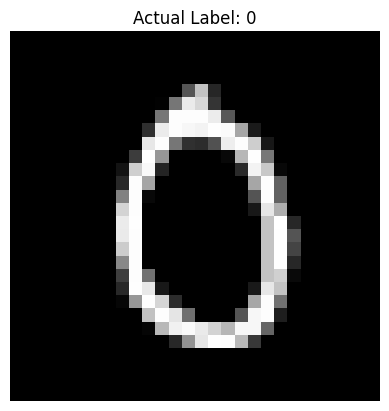

In [ ]:
# this will show the reshaoed image in 28*28 pixels
plt.imshow(image.reshape(28,28), cmap="gray")
plt.title("Actual Label: " + str(y_test[index]))
plt.axis("off")
plt.show()

In [ ]:
# naw prediction

In [ ]:
prediction = model.predict(image.reshape(1, 784))
predicted_label = np.argmax(prediction)

print("Model Prediction:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Model Prediction: 7


In [ ]:
# 7 is the common prdiction so lets take random index parametres for other random numbers

In [ ]:
# the amazing ang fun part comes-- visualizing multiple images at once

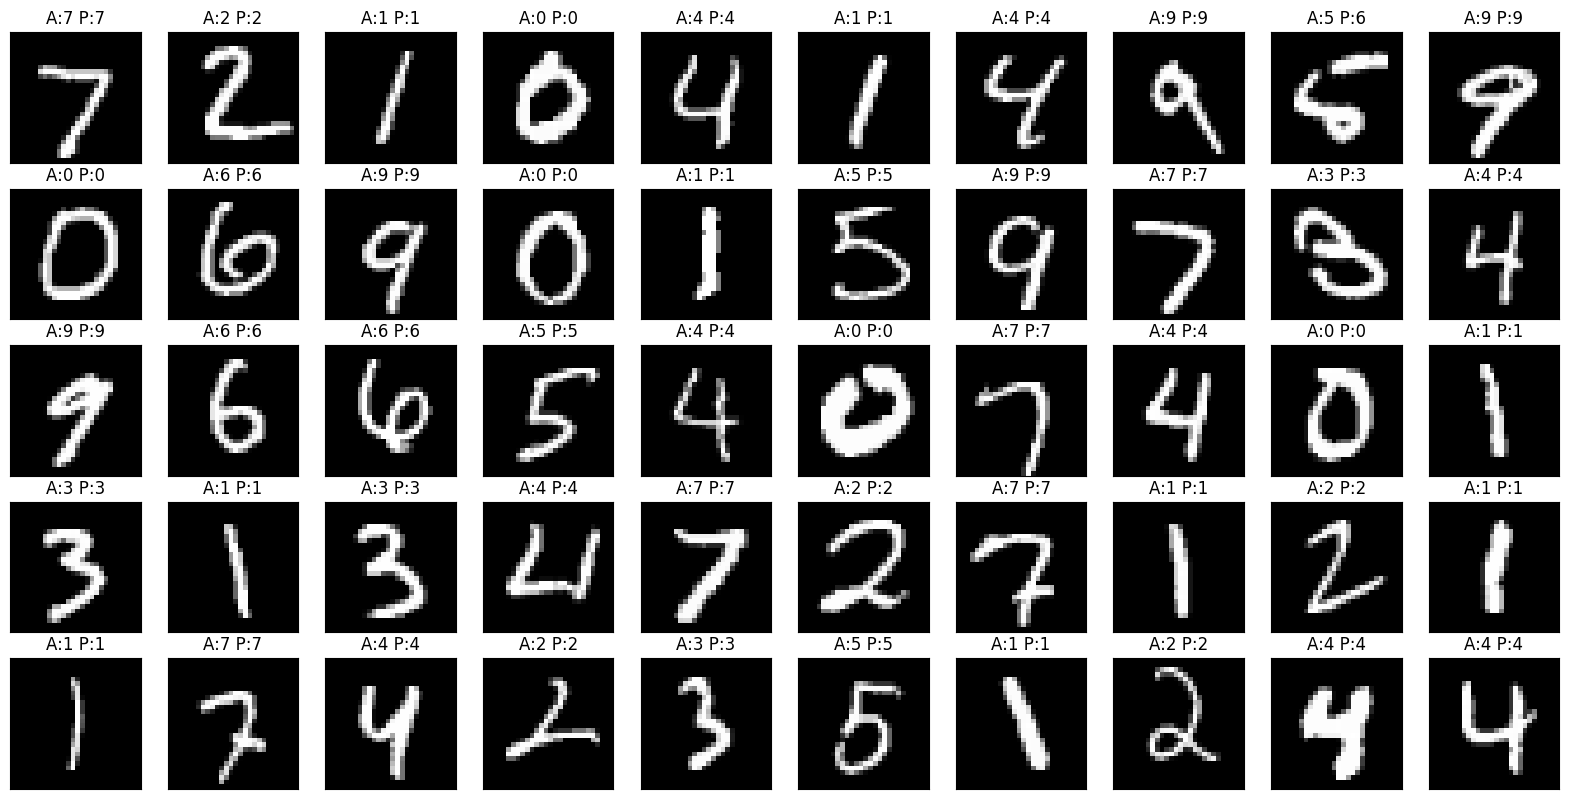

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#  this will Select first 50 test images
num_images = 50
plt.figure(figsize=(20,20))

for i in range(num_images):
    # subplot in a 10x10 grid
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    #  this will be Showing the image
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')

    # Prediction
    prediction = model.predict(x_test[i].reshape(1, 784), verbose=0)
    predicted_label = np.argmax(prediction)

    # Title with Actual vs Predicted
    plt.title(f"A:{y_test[i]} P:{predicted_label}")

plt.show()

In [ ]:
# multiple pictures at once yayyy!! our code works